# K-Means Clustering

## Advantages

- Arbitrary labeling of unlabeled data; meaningful labels can be established from analysis of cluster characteristics.
- Useful in dimensionality reduction.
- Useful in further development of other models.

## Disadvantages

- Requires careful feature engineering and normalization.
- Hyperparameter tuning required to set a $k$ value.
- Works better with numeric features; categorical features can skew results.
- Can be computationally expensive when using the elbow method to find $k$.
- The algorithm is guaranteed to converge but may not converge on the optimal solution.

## References

1. Practical Statistics for Data Scientists, Chapter 7: K-Means Clustering.
1. An Introduction to Statistical Learning, Chapter 10.
1. Hands-On Machine Learning, Chapter 9: K-Means Clustering.
1. [K-means++](http://ilpubs.stanford.edu:8090/778/), David Arthur and Sergei Vassilvitskii, “k-Means++: The Advantages of Careful Seeding,” Proceedings of the 18th Annual ACM-SIAM Symposium on Discrete Algorithms (2007): 1027–1035.
1. Charles Elkan, “Using the Triangle Inequality to Accelerate k-Means,” Proceedings of the 20th International Conference on Machine Learning (2003): 147–153.
1. The triangle inequality is AC ≤ AB + BC where A, B and C are three points and AB, AC, and BC are the distances between these points.
1. David Sculley, “Web-Scale K-Means Clustering,” Proceedings of the 19th International Conference on World Wide Web (2010): 1177–1178.

## The Model

*K-Means Clustering* is an unsupervised learning algorithm that tries to cluster data based on their similarity with a given number of clusters $k$. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:

1. Assign each record to the nearest cluster mean as measured by squared distance. 
1. Compute the new cluster means based on the assignment of records.

These two steps are repeated until the algorithm converges when assignment of clusters does not change.

### Cluster Mean

With two variables $x$ and $y$ assigned each record $(x_i, y_i)$ to a cluster $k$. Given the assignment of $n_k$ records to cluster $k$, the center of the cluster $(\bar{x}_k, \bar{y}_k)$ is the mean of the points in the cluster:

$$
    \bar{x}_k = \frac{1}{n_k}\sum_{i \in \text{ Cluster }k}x_i \\
    \bar{y}_k = \frac{1}{n_k}\sum_{i \in \text{ Cluster }k}y_i
$$

### Cluster Sum of Squares

$$
    SS_k = \sum_{i \in \text{ Cluster }k}(x_i - \bar{x}_k)^2 + (y_i - \bar{y}_k)^2
$$

K-means finds the assignment of records that minimizes within-cluster sum of squares across all clusters $j$:

$$
    SS = \sum_{k=1}^{j}SS_k
$$

## K-Means++

An important improvement of *K-Means++* was proposed in 2006. This implements a smarter initialization step that tends to select centroids that are distant from each other. This improves the computation time by reducing the number of jobs, and reduces the chances of centroids converging on top of each other.

1. Take one centroid $c^{(1)}$, chosen uniformly at random from the dataset.
1. Take a new centroid $c^{(i)}$, choosing an instance $x^{(i)}$ with probability $D(x^{(i)})^2 / \Sigma_{j=1}^{m}D(x^{(j)})^2$, where $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen. This probability distribution ensures that instances farther away from already chosen centroids are much more likely be selected as centroids.
1. Repeat the previous step until all $k$ centroids have been chosen.

## Videos

In [1]:
from IPython.display import IFrame

### StatQuest: K-Means Clustering

In [2]:
IFrame('https://www.youtube.com/embed/4b5d3muPQmA', width=560, height=315)

---

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = load_digits()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
digits = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [8]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
digit_labels = pd.Series(data['target'], name='labels')

In [10]:
digit_labels_comp = digit_labels.value_counts(normalize=True)

## K-Means Clustering in Scikit-Learn

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(digits)

KMeans(n_clusters=10, random_state=0)

### Parameters

Coordinates of cluster centroids.

In [13]:
kmeans.cluster_centers_[:5]

array([[ 0.00000000e+00,  1.11022302e-16,  3.07228916e-01,
         7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
         1.50602410e-01,  5.42168675e-02,  1.73472348e-18,
         1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
         8.46385542e+00,  1.53012048e+00,  9.75903614e-01,
         2.77108434e-01,  8.67361738e-19,  6.44578313e-01,
         1.07108434e+01,  1.15602410e+01,  4.33734940e+00,
         5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
         6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
         5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
         6.21686747e+00,  1.80722892e-02,  0.00000000e+00,
         8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
         1.28132530e+01,  1.43915663e+01,  5.48192771e+00,
         0.00000000e+00,  9.63855422e-02,  6.50602410e+00,
         1.16867470e+01,  1.23433735e+01,  1.48373494e+01,
         1.07590361e+01,  1.56626506e+00,  3.46944695e-18,
         6.02409639e-02,  1.11445783e+00,  3.00000000e+0

*Hard Clustering*. Assigned numeric labels of each record.

In [14]:
kmeans.labels_

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

*Soft Clustering*. Gives the distance to each centroid for comparison.

If you have high dimensional data, this can be used for a very efficient nonlinear dimensionality reduction technique.

In [24]:
kmeans.transform(digits)[0]

array([40.62842111, 39.25072873, 39.4060487 , 32.23484822, 42.37522367,
       14.00270609, 46.73469512, 44.68092395, 46.29322479, 41.74284925])

*Inertia* is the sum of squared distances of samples to their closest cluster centroid. This is not a good metric as inertia proportionally decreases as we increase $k$.

In [15]:
kmeans.inertia_

1165177.7137062165

### Evaluation

Given that the digits dataset is roughly balanced between each class, K-Means clustering should return cluster labels that are equivalent in proportion.

In [16]:
cluster_labels = pd.Series(data=kmeans.labels_, name='cluster_labels')

In [17]:
cluster_labels_comp = cluster_labels.value_counts(normalize=True)

...And we compare it to the class composition of the digits dataset.

In [18]:
cluster_labels_comp

3    0.139121
7    0.124652
4    0.114636
9    0.101280
5    0.099610
1    0.097941
8    0.097385
0    0.092376
2    0.082916
6    0.050083
Name: cluster_labels, dtype: float64

In [19]:
digit_labels_comp

3    0.101836
1    0.101280
5    0.101280
4    0.100723
6    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
Name: labels, dtype: float64

In [20]:
import yellowbrick.cluster as ybcl

#### Silhouette Visualizer

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for K
by comparing multiple visualizers.

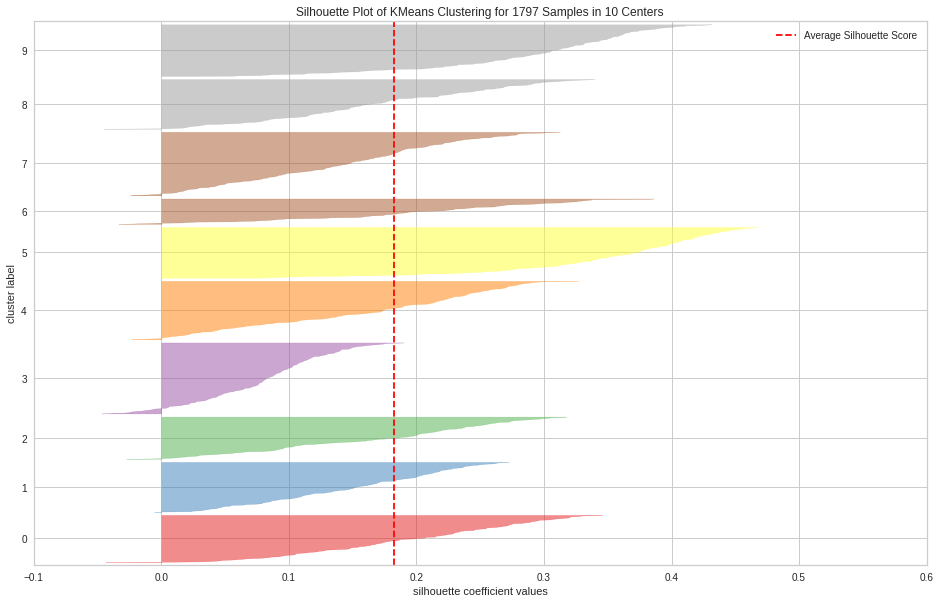

In [21]:
fig, ax = plt.subplots(figsize=(16,10))
viz = ybcl.SilhouetteVisualizer(kmeans, is_fitted=True, ax=ax)
viz.fit(digits)
viz.show()
plt.show()

#### Intercluster Distance Maps

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

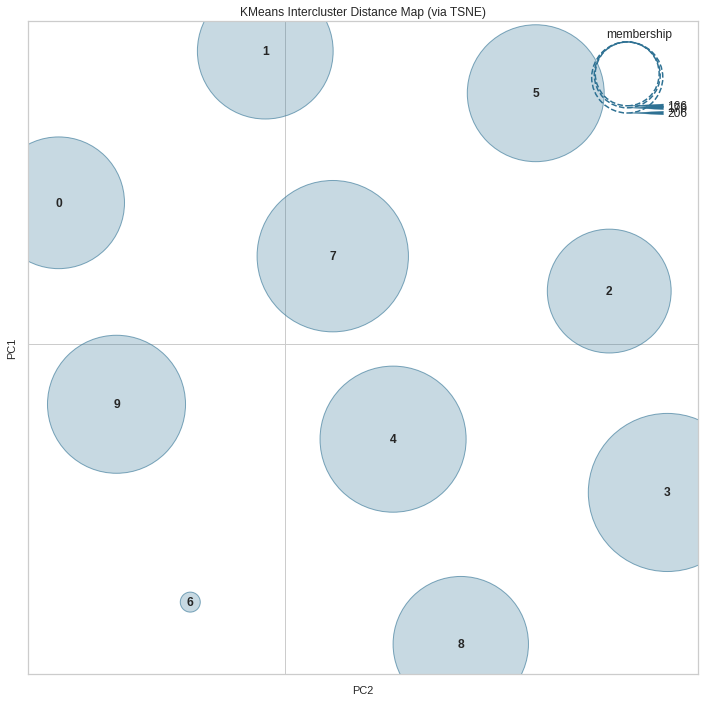

In [22]:
fig, ax = plt.subplots(figsize=(12,12))
viz = ybcl.InterclusterDistance(
    kmeans, 
    embedding='tsne',
    is_fitted=True, 
    legend_loc='upper right', 
    ax=ax
)
viz.fit(digits)
viz.show()
plt.show()

### Elbow Method for Selecting $k$

The *KElbowVisualizer* implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for $k$. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

To demonstrate, in the following example the *KElbowVisualizer* fits the KMeans model for a range of $k$
values from 4 to 11 on a sample two-dimensional dataset with 8 random clusters of points. When the model is fit with 8 clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.

In [27]:
from sklearn.datasets import make_blobs

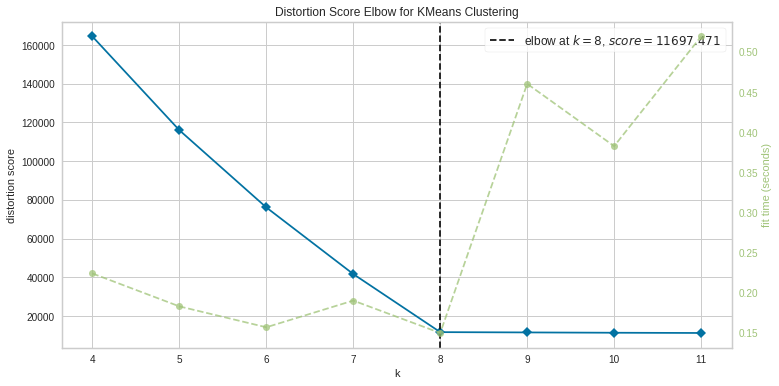

In [34]:
# Example from: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=0)

# Instantiate the clustering model and visualizer
model = KMeans()

fig, ax = plt.subplots(figsize=(12,6))
viz = ybcl.KElbowVisualizer(model, k=(4,12), ax=ax)
viz.fit(X)
viz.show()
plt.show()